In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [11]:
RCDF=pd.read_csv("Cust_Spend_Data.csv")

In [12]:
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [13]:
data_f=data.iloc[:,2:]
data_f

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [14]:
data_f_z = data_f.apply(zscore)
data_f_z

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [15]:
from scipy.spatial.distance import pdist,squareform

In [16]:
pdist

<function scipy.spatial.distance.pdist(X, metric='euclidean', *args, **kwargs)>

In [17]:
help(pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a
        list of 

In [26]:
d_euc=pdist(data_f_z,metric = "euclidean")

In [27]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [28]:
help(linkage)
clus1=linkage(d_euc,method = 'average')

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [29]:
import matplotlib.pyplot as plt

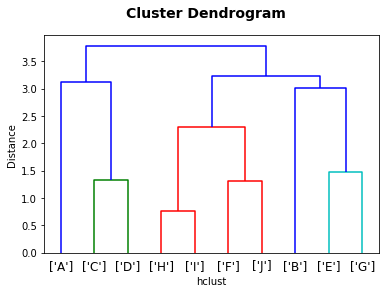

In [30]:
dendrogram(clus1, labels=RCDF[["Name"]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight ='bold',fontsize=14);